# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
sensor.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


How many rows and columns are in our data?

In [5]:
sensor.shape


(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [6]:
sensor["dates"] = pd.date_range("01/01/2018 00:00:00","01/01/2018 00:29:10", periods=len(sensor))
infered_freq_using_method = pd.infer_freq(sensor["dates"])



Assign the time series index to the dataframe's index.

In [7]:
sensor.set_index("dates",inplace=True)
sensor.index.freq = infered_freq_using_method
sensor.index


DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', name='dates', length=1751, freq='S')

In [8]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
sensor.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', name='dates', length=1751, freq='S')

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

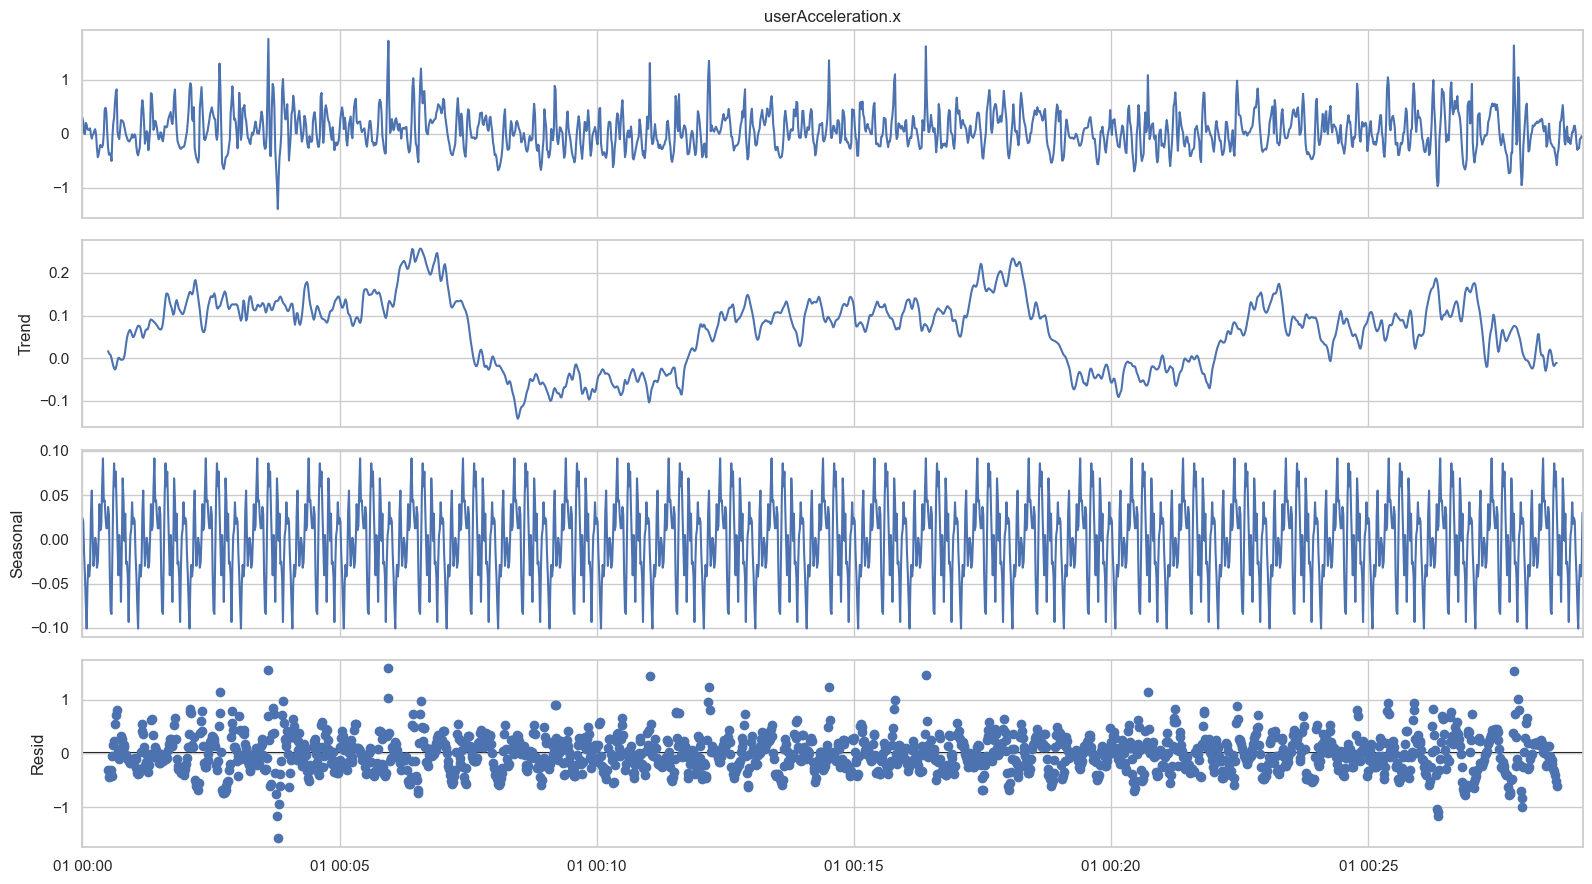

In [9]:
decompose_acceleration = seasonal_decompose(sensor["userAcceleration.x"], period=60)
decompose_acceleration.plot();


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

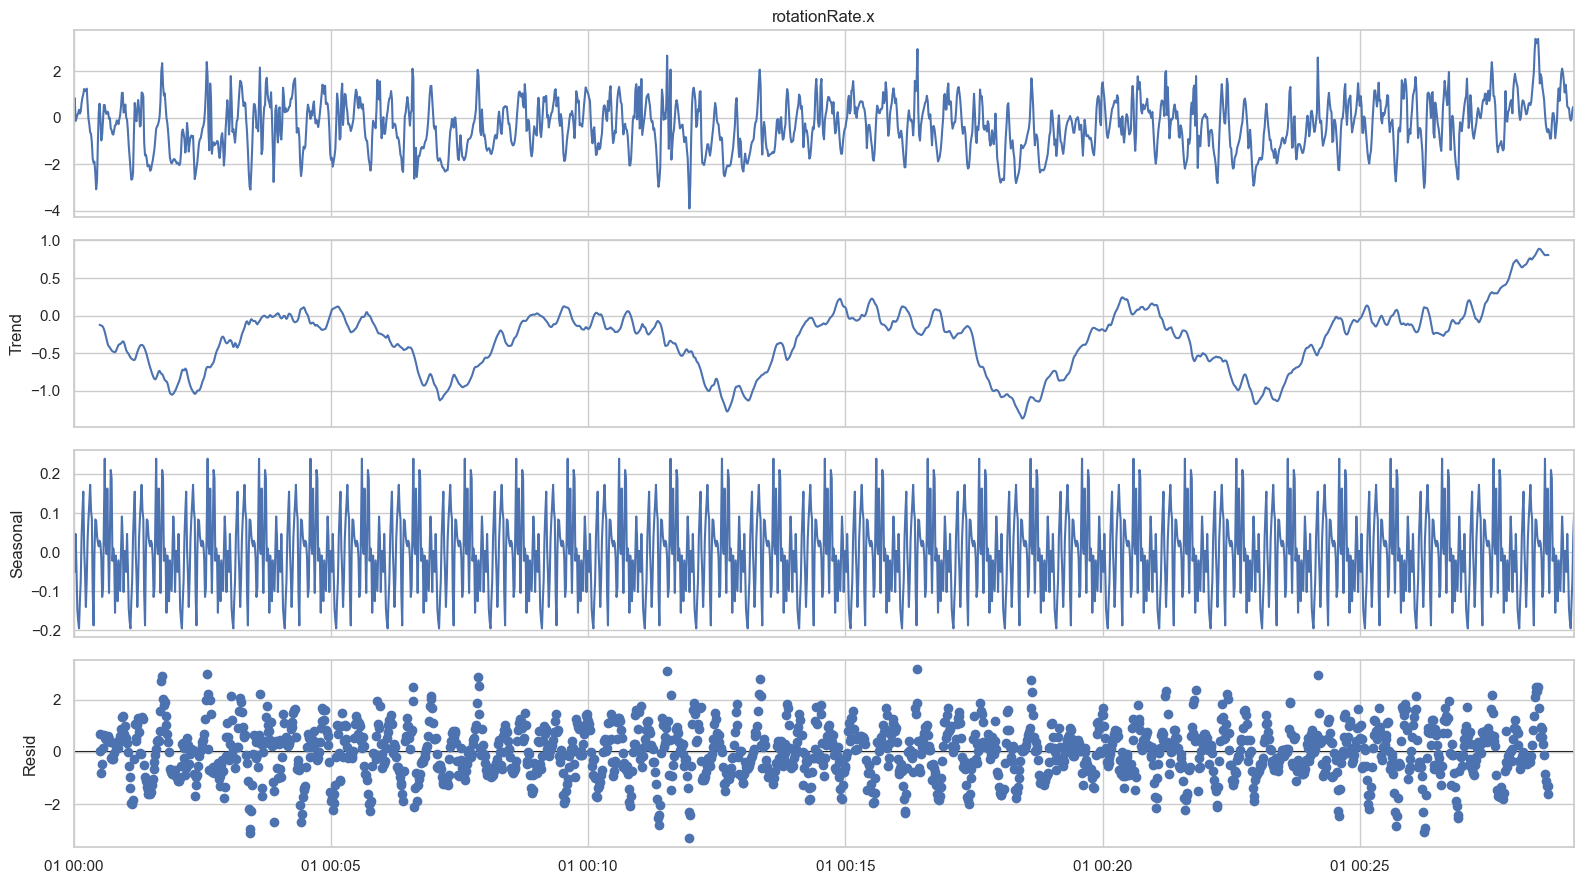

In [10]:
decompose_rotation = seasonal_decompose(sensor["rotationRate.x"], period=60)
decompose_rotation.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

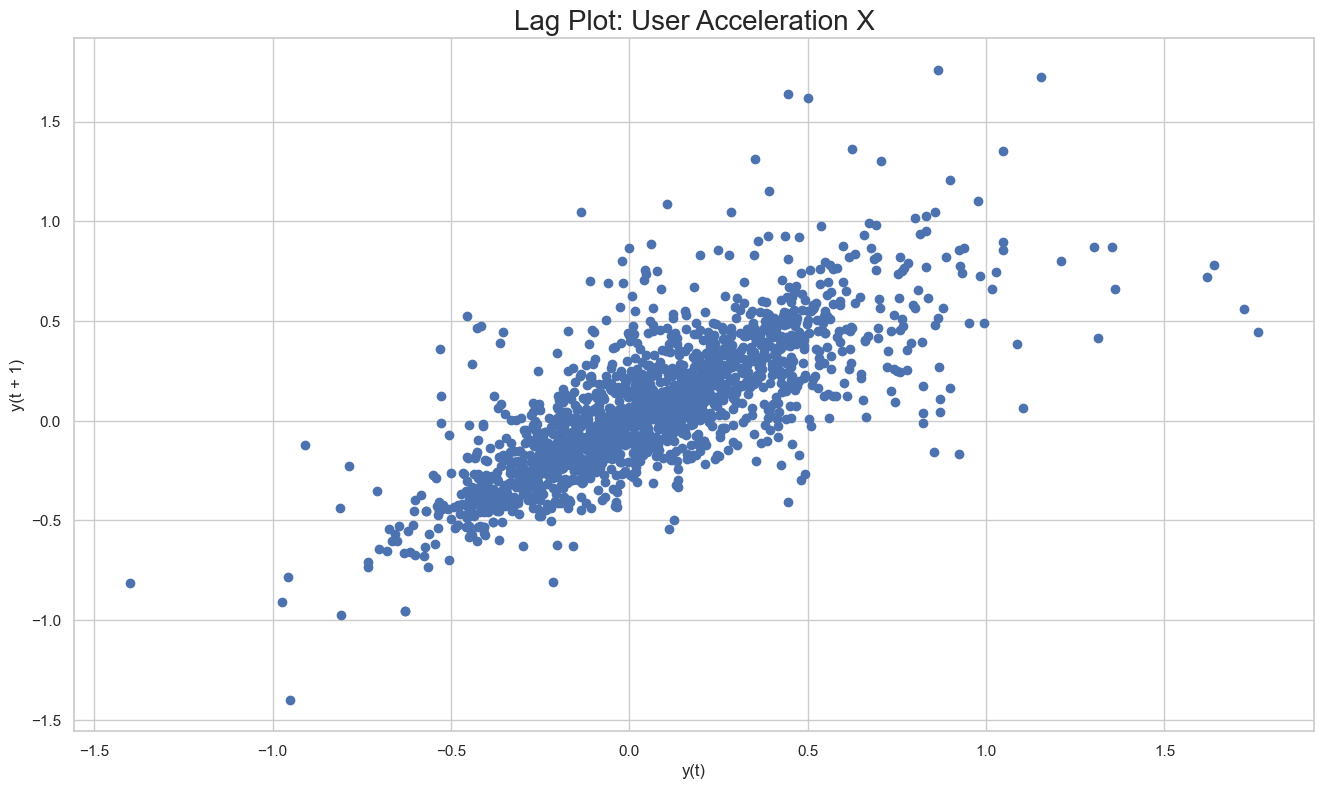

In [11]:
pd.plotting.lag_plot(sensor["userAcceleration.x"]);
plt.title("Lag Plot: User Acceleration X", size=20);



Create a lag plot for `rotationRate.x`

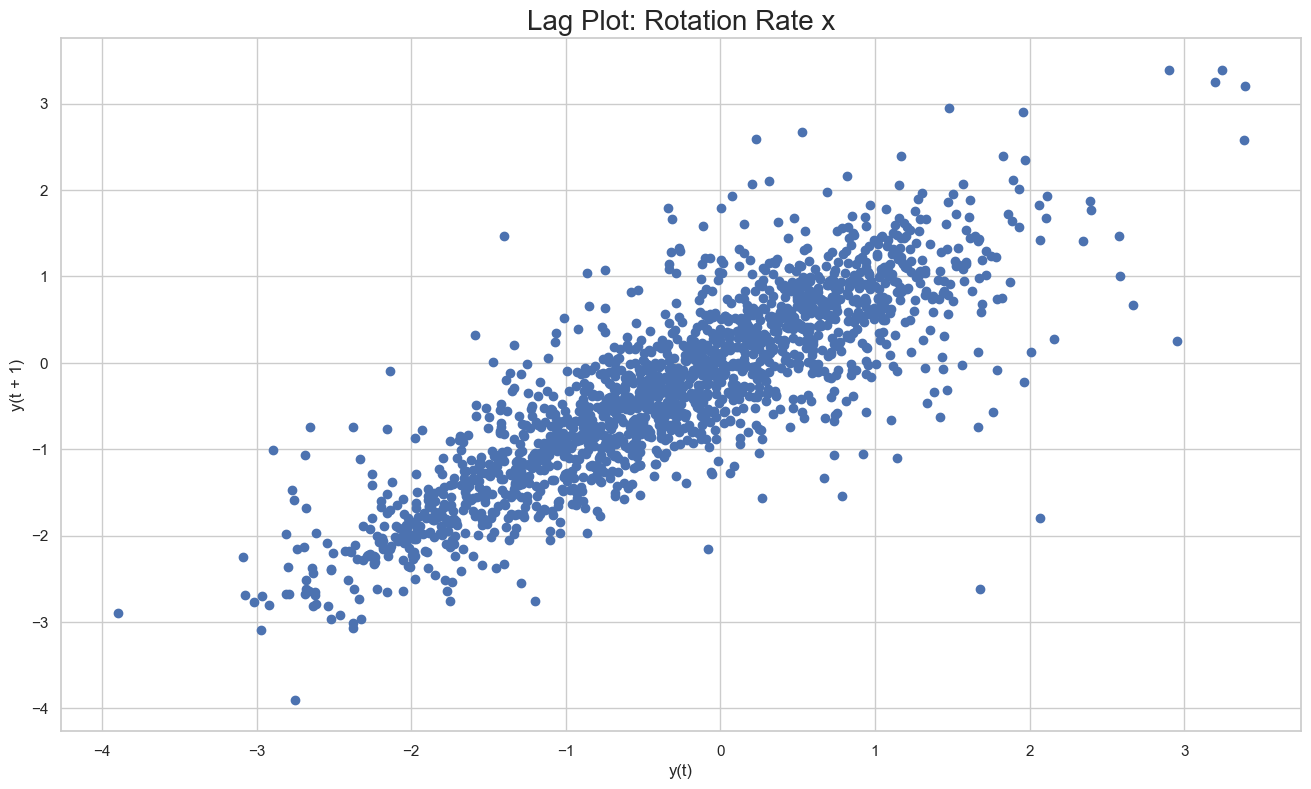

In [12]:
pd.plotting.lag_plot(sensor["rotationRate.x"]);
plt.title("Lag Plot: Rotation Rate x", size=20);





What are your conclusions from both visualizations?

In [13]:
'''
First lag plot shows an strong correlation as data points have low scattering level (User Acceleration). 
Second chart (Rotation X) has a higher level of dispersion.
it seems that this dataframe is based on some kind of drone data flight. 
In this case, it seems that user acceleration is cyclic along the time 
Same for rotation rate , guessing that it should rotate over itself (cyclic pattern)
''';

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [14]:
from statsmodels.tsa.stattools import adfuller

def dickey_rejects (series, alpha = 0.05):
    p_value = adfuller(series)[0]
    h0 = "The series is NOT stationary"
    h1 = "The series IS stationary"
    if p_value < alpha:
        return f"We reject H0 and accept H1: {h1}"
    elif p_value > alpha:
        return f"We don't have enough info to reject H0, so we keep H0: {h0}"

ad_rotation = dickey_rejects(sensor["rotationRate.x"])
ad_useracceleration = dickey_rejects(sensor["userAcceleration.x"])
print(f"User Acceleration: {ad_useracceleration}")
print(f"Rotation: {ad_rotation}")

User Acceleration: We reject H0 and accept H1: The series IS stationary
Rotation: We reject H0 and accept H1: The series IS stationary


What are your conclusions from this test?

In [15]:

'''
After get Dickey-Fuller test results, we conclude that time series are stationary. It means that mean, variance and
autocorrelation are constant along range time analized. 

''';

## Bonus: Challenge 2

Finally, we'll create an ARIMA model for `userAcceleration.x`. Load the `ARIMA` function from `statsmodels`. The order of the model is (2, 0, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [16]:
order = (2, 0, 1)

In [17]:
# 0. Splitting into train & test
y_train = sensor["userAcceleration.x"][:-10]
y_test = sensor["userAcceleration.x"][-11:]


In [18]:
# 1. Create an instance of the ARIMA model that takes y_train, the order, and freq="S"
# Docs: https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html

model = ARIMA(y_train, order = (2, 0, 1), freq="S")



In [19]:
# 2. Fit the model:
model = model.fit()
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:     userAcceleration.x   No. Observations:                 1741
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 373.401
Date:                Tue, 14 Nov 2023   AIC                           -736.803
Time:                        16:34:14   BIC                           -709.492
Sample:                    01-01-2018   HQIC                          -726.704
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0637      0.016      3.994      0.000       0.032       0.095
ar.L1          0.9882      0.036     27.630      0.000       0.918       1.058
ar.L2         -0.3788      0.033    -11.637      0.0

In [21]:
# 3. Predict: create y_pred:
sensor["arima_test"] = model.predict(start=len(sensor['userAcceleration.x']) - 1000, end=len(sensor['userAcceleration.x']) +1000)
y_pred = sensor["arima_test"]
y_pred

dates
2018-01-01 00:00:00         NaN
2018-01-01 00:00:01         NaN
2018-01-01 00:00:02         NaN
2018-01-01 00:00:03         NaN
2018-01-01 00:00:04         NaN
                         ...   
2018-01-01 00:29:06    0.053770
2018-01-01 00:29:07    0.056783
2018-01-01 00:29:08    0.060638
2018-01-01 00:29:09    0.063308
2018-01-01 00:29:10    0.064485
Freq: S, Name: arima_test, Length: 1751, dtype: float64

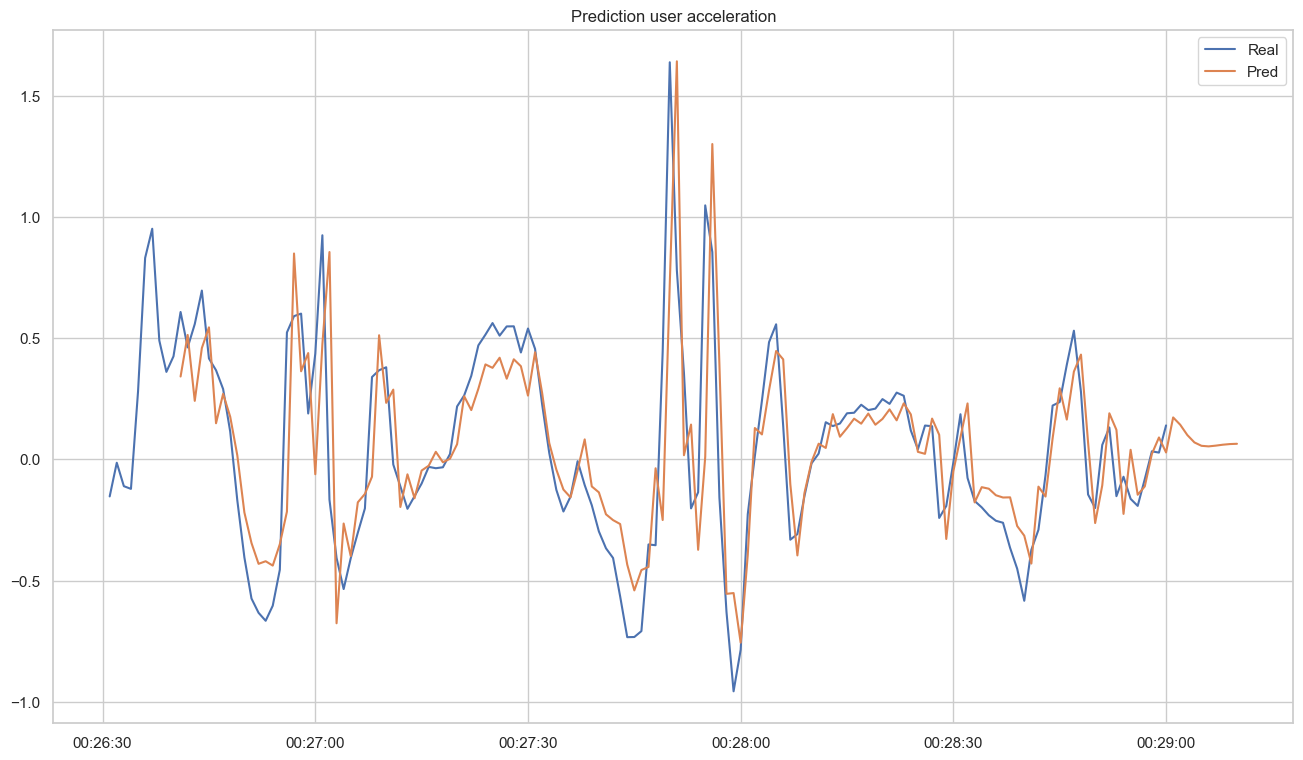

In [24]:
# 4. Visualize
plt.plot(y_train[-150:], label = "Real")
plt.plot(y_pred[-150:], label = "Pred")
plt.title("Prediction user acceleration")
plt.legend();

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [30]:
from statsmodels.tools.eval_measures import rmse

y_pred = sensor['arima_test'][-11:]
error = rmse(y_pred, y_test)

print('The RMSE for the last 10 rows of the userAcceleration.x column is:', error)




The RMSE for the last 10 rows of the userAcceleration.x column is: 0.21742521557939207
